In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.svm import SVR
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50,40

In [63]:
df1 = pd.read_csv('sensex.csv', parse_dates = ['Date'], index_col = 'Date')
df1 = df1['2017-01-20' : '2019-01-18']

In [64]:
df2 = pd.read_csv('NYSE.csv', parse_dates = ['Date'], index_col = 'Date')
df2 = df2['2017-01-20' : '2019-01-18']

In [65]:
df3 = pd.read_csv('Exchange.csv', parse_dates = ['Unnamed: 1'], index_col = 'Unnamed: 1')
df3 = df3['2017-01-20' : '2019-01-18']

In [66]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,27232.689453,27264.410156,27009.810547,27034.500000,27034.500000,8800.0
2017-01-23,26990.929688,27167.789063,26963.580078,27117.339844,27117.339844,6600.0
2017-01-24,27170.880859,27393.349609,27140.849609,27375.580078,27375.580078,6800.0
2017-01-25,27462.830078,27736.830078,27439.679688,27708.140625,27708.140625,12200.0
2017-01-27,27761.029297,27980.390625,27759.480469,27882.460938,27882.460938,14300.0


In [67]:
df1 = df1.drop(['High', 'Open'], axis = 1)

In [68]:
df1 = df1.drop(['Low', 'Volume'], axis = 1)

In [69]:
df1 = df1.drop(['Adj Close'], axis = 1)

In [70]:
df1.head()

,Close
Date,
2017-01-20,27034.500000
2017-01-23,27117.339844
2017-01-24,27375.580078
2017-01-25,27708.140625
2017-01-27,27882.460938


In [71]:
df3.head()

,exc
Unnamed: 1,
2017-01-20,68.0883
2017-01-23,68.0843
2017-01-24,68.1570
2017-01-25,68.1556
2017-01-27,68.2043


In [72]:
df1['SENSEX'] = df1.Close

In [73]:
df1 = df1.drop(['Close'], axis = 1)

In [74]:
df1['NYSE'] = df2.Close

In [75]:
df1['Exc'] = df3.exc 

In [76]:
df = df1
df = df.diff(periods = 1)

In [77]:
df = df['2017-01-20' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,SENSEX,NYSE,Exc
Date,,,
2017-01-23,82.839844,-22.169922,-0.0040
2017-01-24,258.240234,78.660156,0.0727
2017-01-25,332.560547,89.769532,-0.0014
2017-01-27,174.320313,-55.859375,0.0487
2017-01-30,-32.900391,-77.950196,-0.1617
2017-01-31,-193.599609,17.719727,-0.2301
2017-02-01,485.679687,-15.719727,-0.1667
2017-02-02,84.968750,8.149414,-0.1978
2017-02-03,13.910156,95.350586,-0.0655


In [78]:
df = df.dropna()
df.asfreq('D', method="pad")

,SENSEX,NYSE,Exc
Date,,,
2017-01-23,82.839844,-22.169922,-0.0040
2017-01-24,258.240234,78.660156,0.0727
2017-01-25,332.560547,89.769532,-0.0014
2017-01-26,332.560547,89.769532,-0.0014
2017-01-27,174.320313,-55.859375,0.0487
2017-01-28,174.320313,-55.859375,0.0487
2017-01-29,174.320313,-55.859375,0.0487
2017-01-30,-32.900391,-77.950196,-0.1617
2017-01-31,-193.599609,17.719727,-0.2301


In [79]:
from statsmodels.tsa.api import VAR, DynamicVAR

In [80]:
model = VAR(df[:'2019-01-09'])

/home/umang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [81]:
results = model.fit(maxlags=20, ic='aic')

In [82]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Apr, 2019
Time:                     15:21:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    17.3318
Nobs:                     434.000    HQIC:                   17.1103
Log likelihood:          -5490.04    FPE:                2.33446e+07
AIC:                      16.9658    Det(Omega_mle):     2.13665e+07
--------------------------------------------------------------------
Results for equation SENSEX
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            14.710359        11.349672            1.296           0.195
L1.SENSEX         0.025191         0.051952            0.485           0.628
L1.NYSE           0.496410         0.126791            3.915           0.00

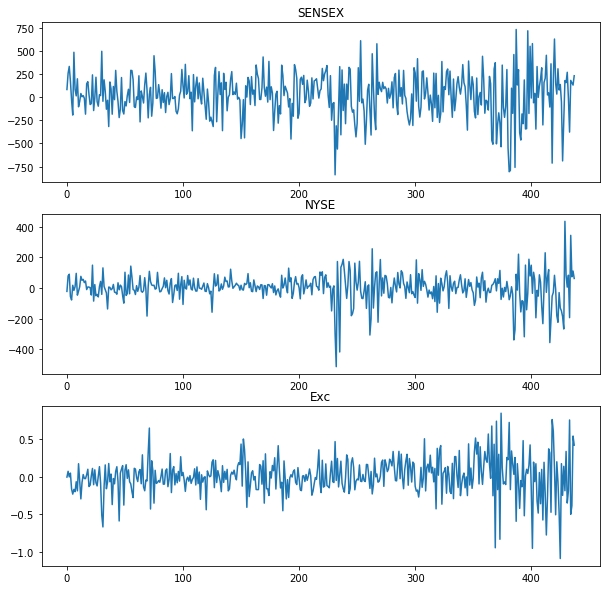

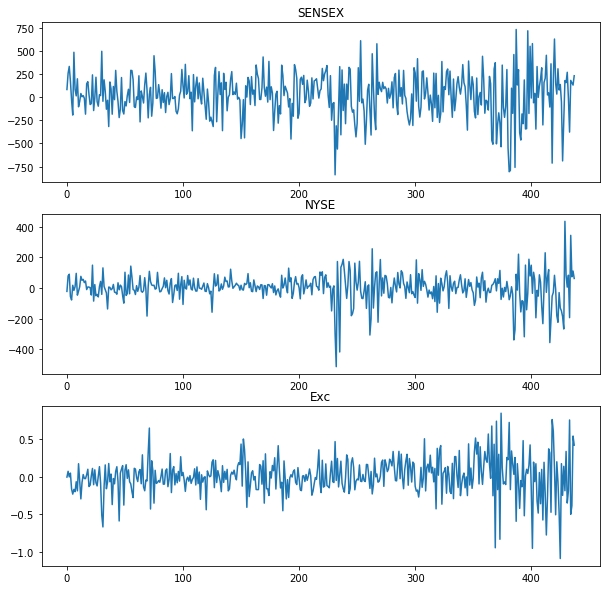

In [83]:
results.plot()

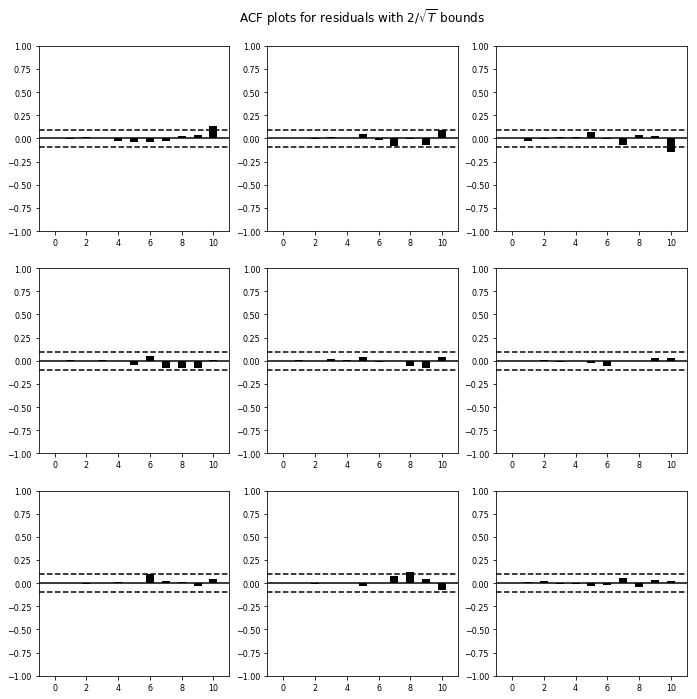

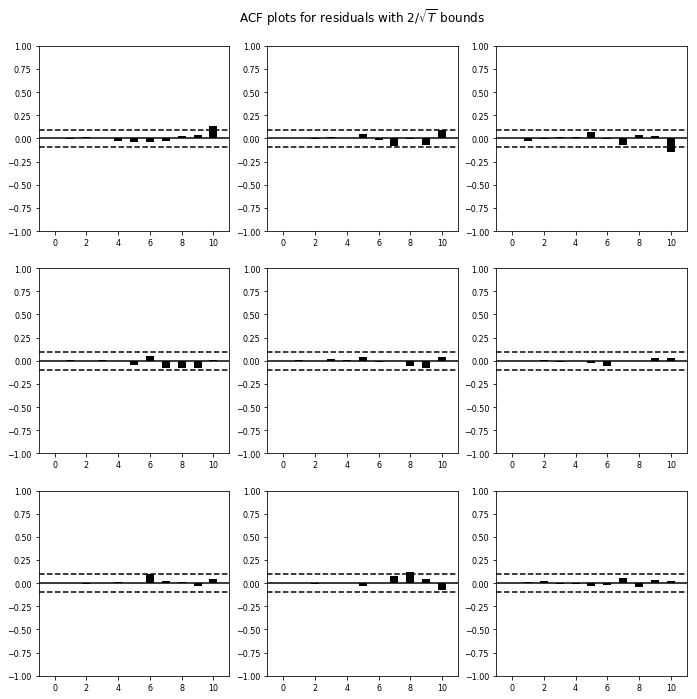

In [84]:
results.plot_acorr()

In [85]:
lag_order = results.k_ar

In [86]:
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    #print(last_ob)
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    
    print(inverted)
    return inverted

In [87]:
df1.SENSEX['2019-01-08']

35980.929688

In [88]:
temp = results.forecast(df.values[-lag_order:], 10)
temp1 = inverse_difference(df1.SENSEX['2019-01-08'], temp[:, 0])

[36029.42416813771, 36107.491126004665, 36127.70996734569, 36177.76676492042, 36197.943686495, 36225.59071906583, 36249.26524988036, 36277.45217210096, 36296.36345955139, 36317.23799304511]


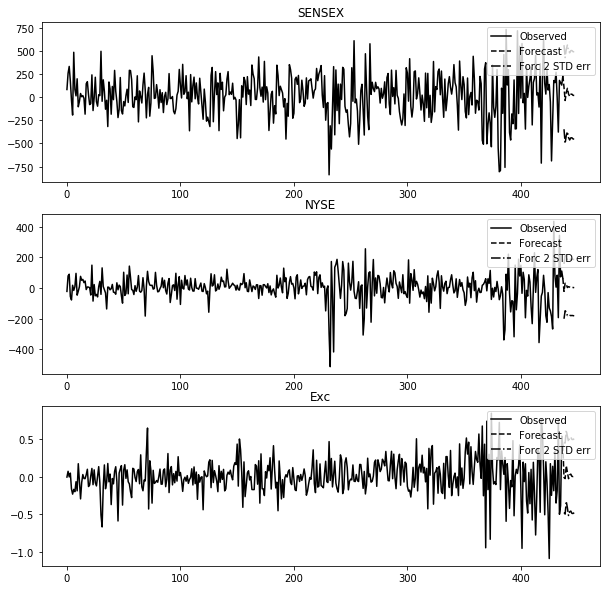

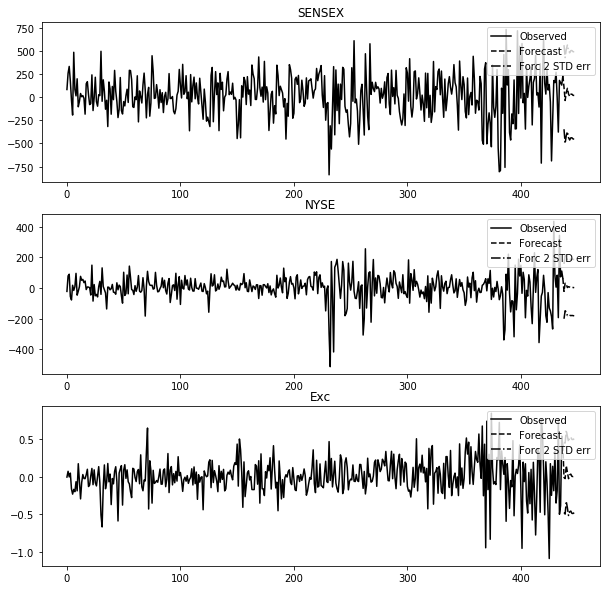

In [89]:
results.plot_forecast(10)

In [90]:
s = temp1
test = df1.SENSEX['2019-01-09':]

In [91]:
p = np.array(test)

In [92]:
p

array([36212.910156, 36106.5     , 36009.839844, 35853.558594,
       36318.328125, 36321.289063, 36374.078125, 36386.609375])

In [93]:
s

[36029.42416813771,
 36107.491126004665,
 36127.70996734569,
 36177.76676492042,
 36197.943686495,
 36225.59071906583,
 36249.26524988036,
 36277.45217210096,
 36296.36345955139,
 36317.23799304511]

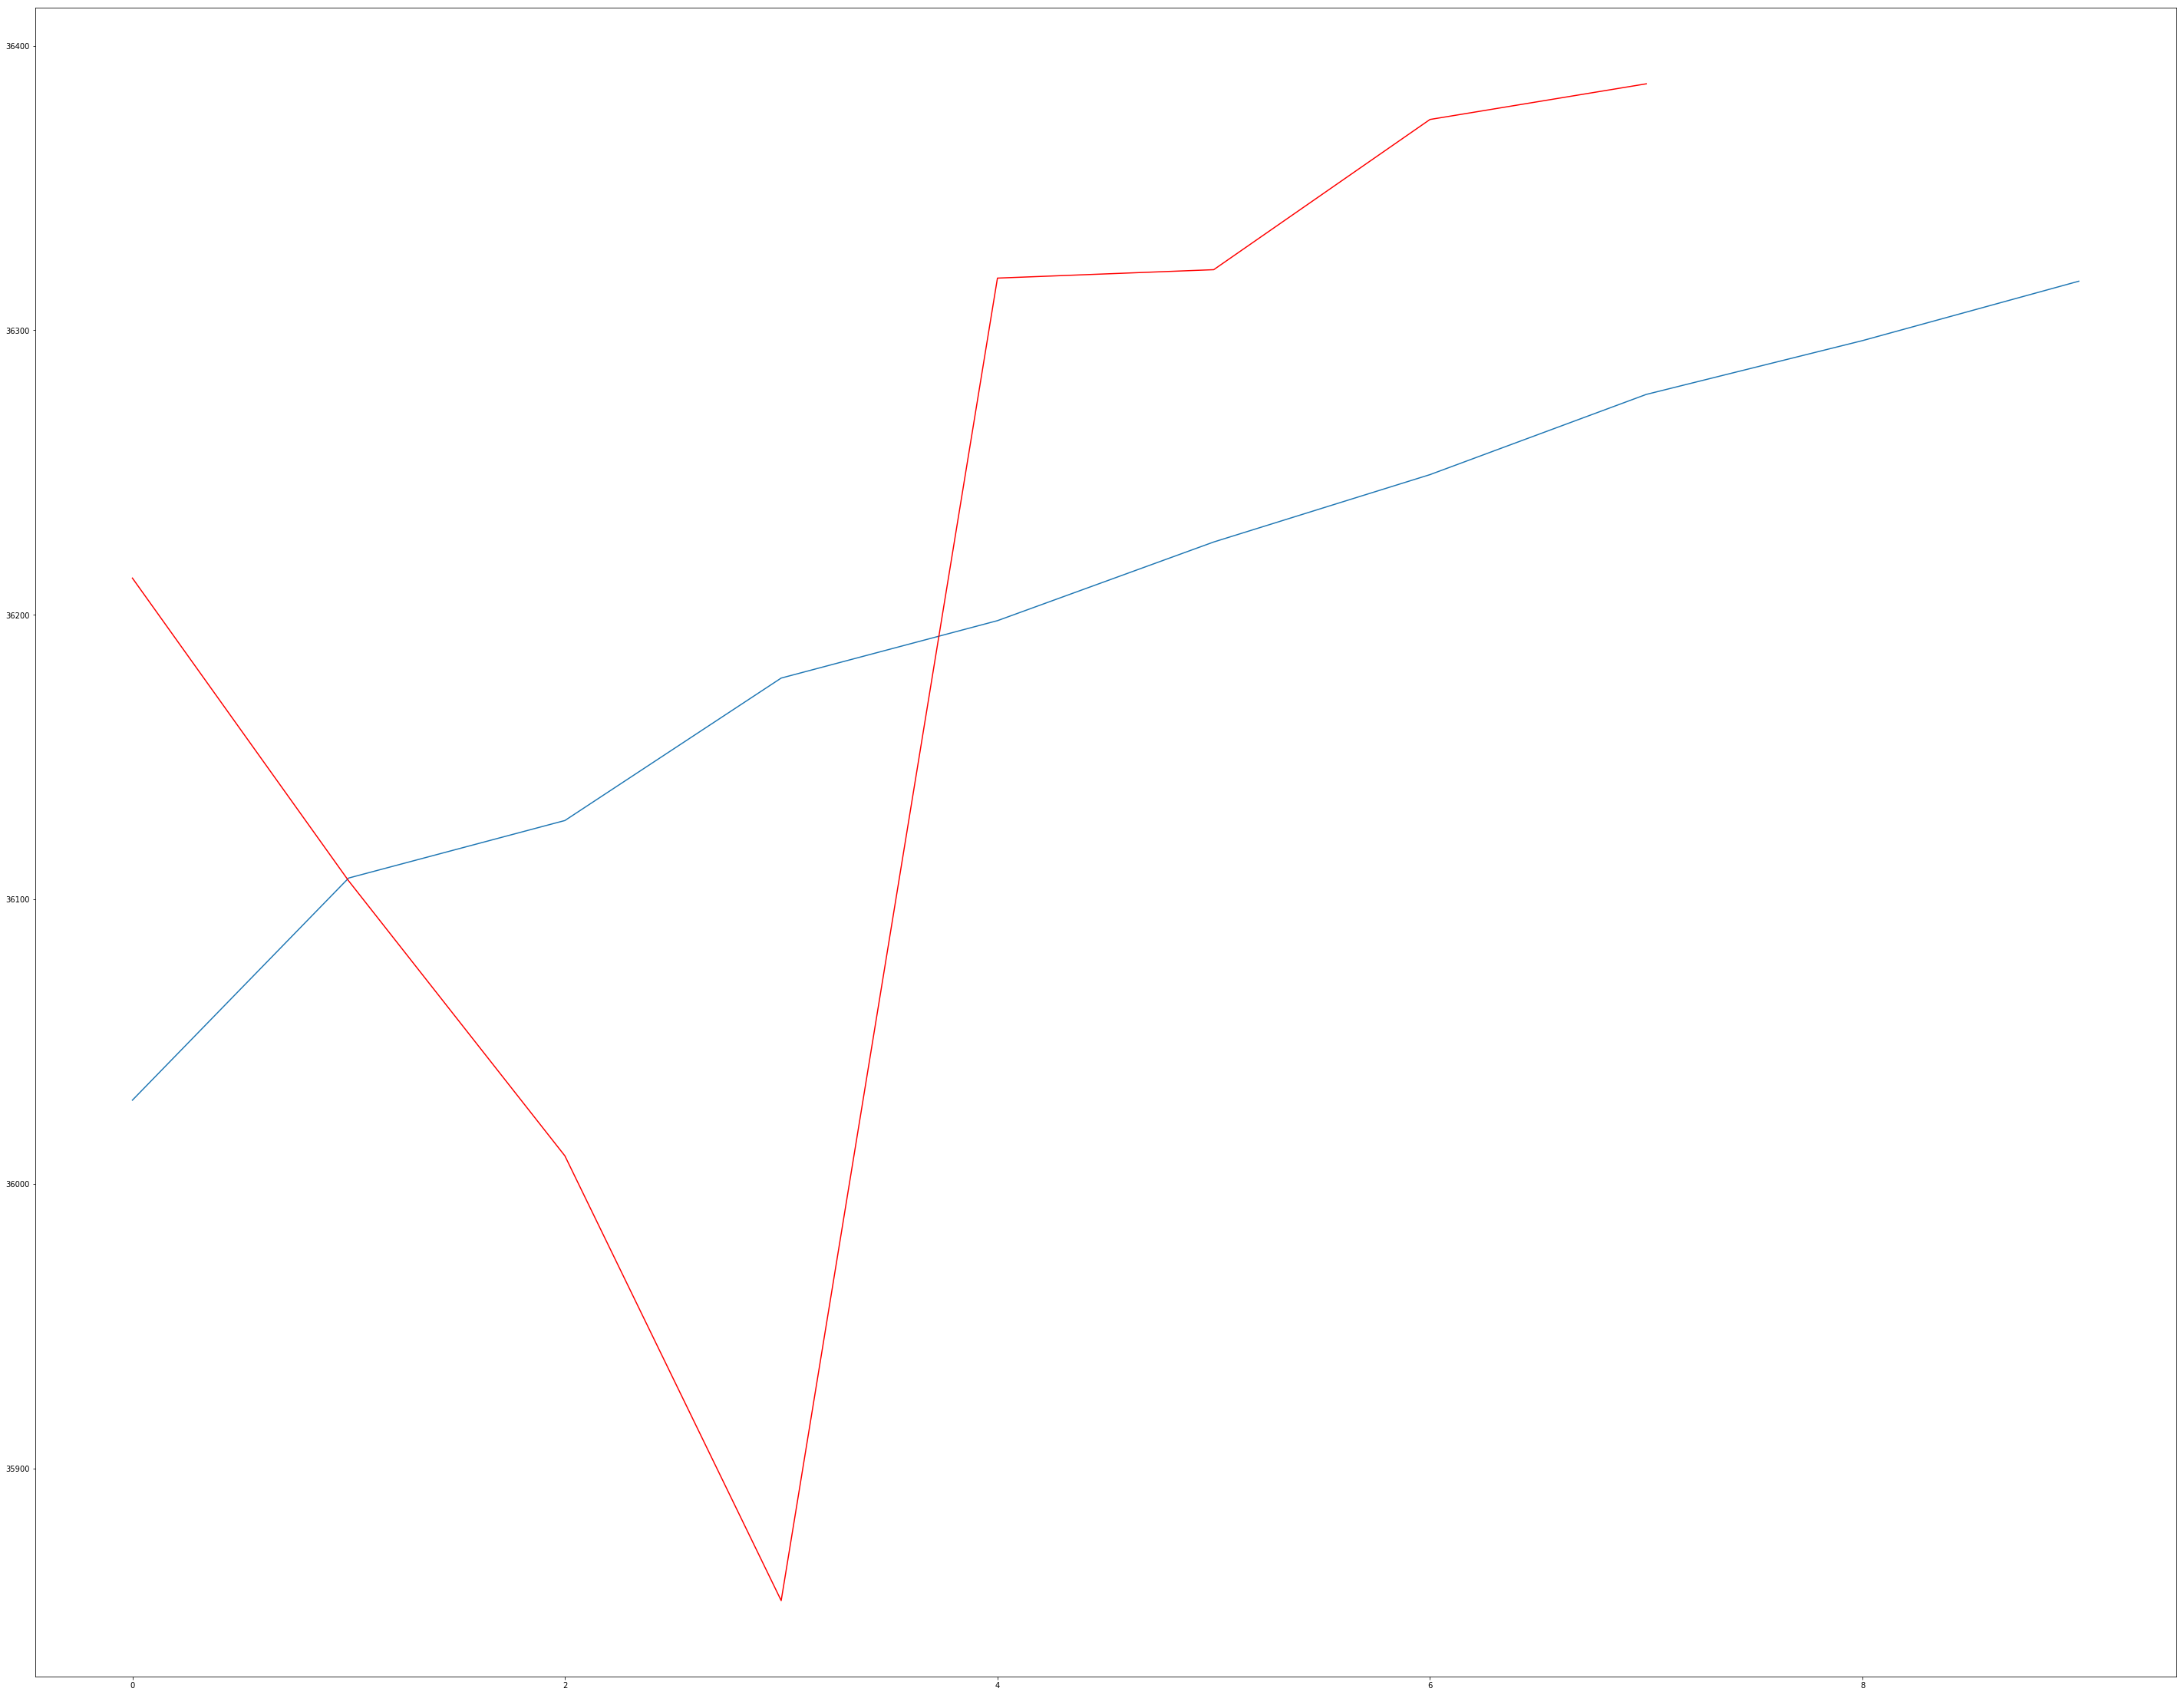

In [94]:
plt.plot(s)
plt.plot(p, color='red')

In [95]:
 irf = results.irf(10)

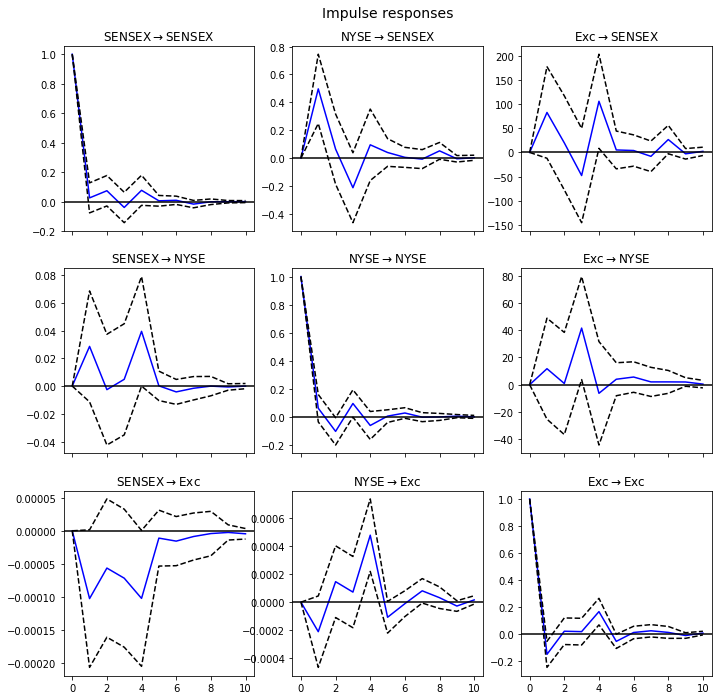

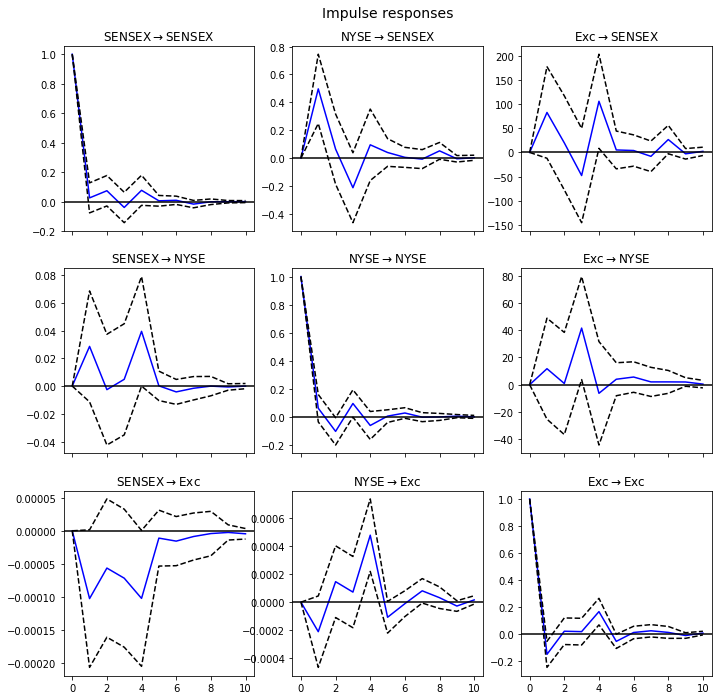

In [96]:
irf.plot(orth=False)

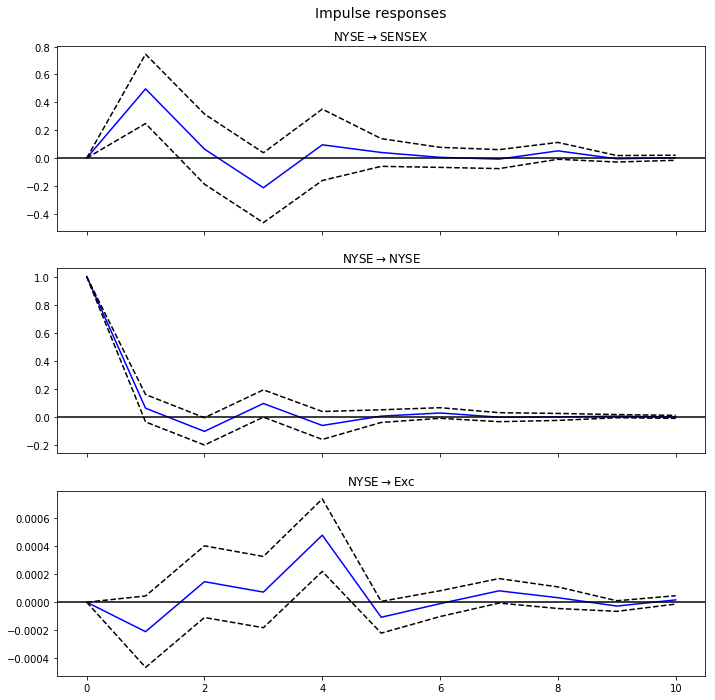

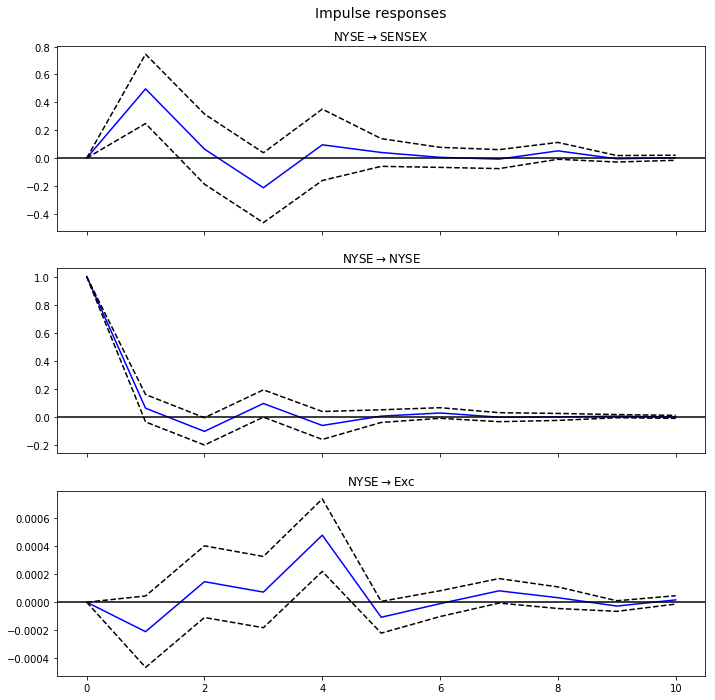

In [97]:
irf.plot(impulse='NYSE')

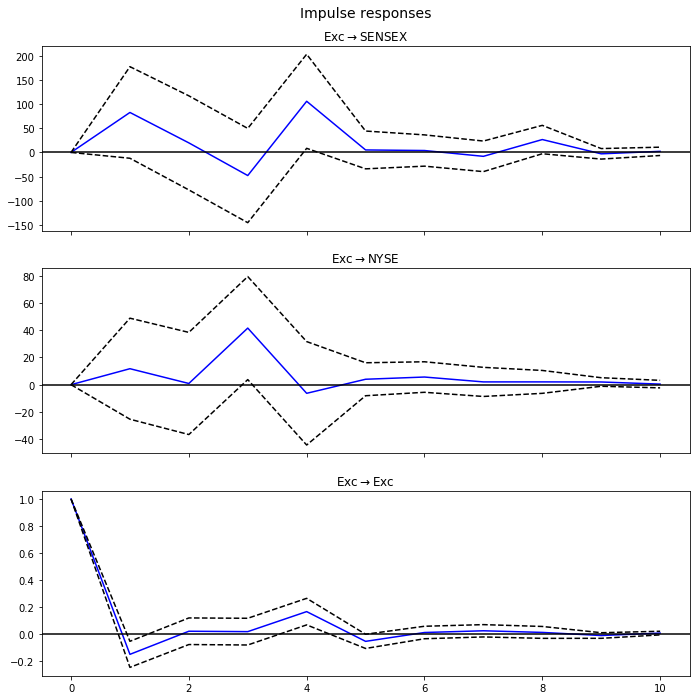

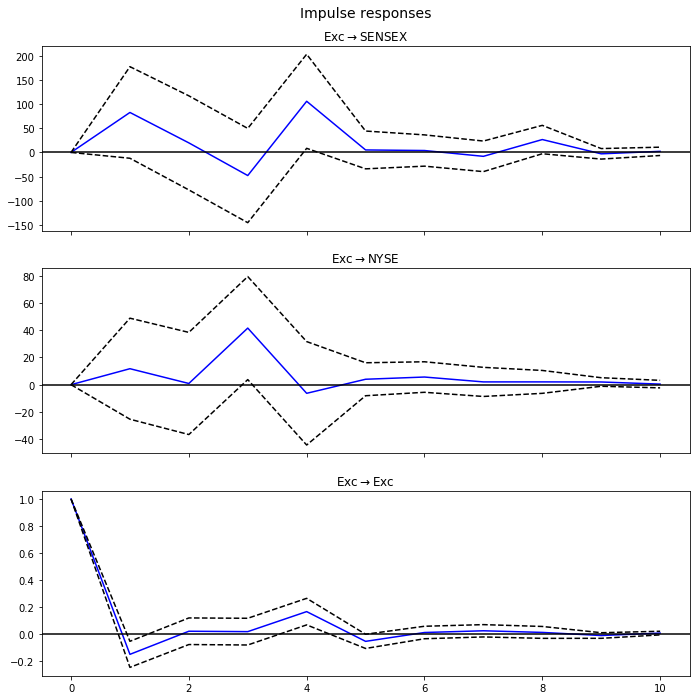

In [99]:
irf.plot(impulse='Exc')

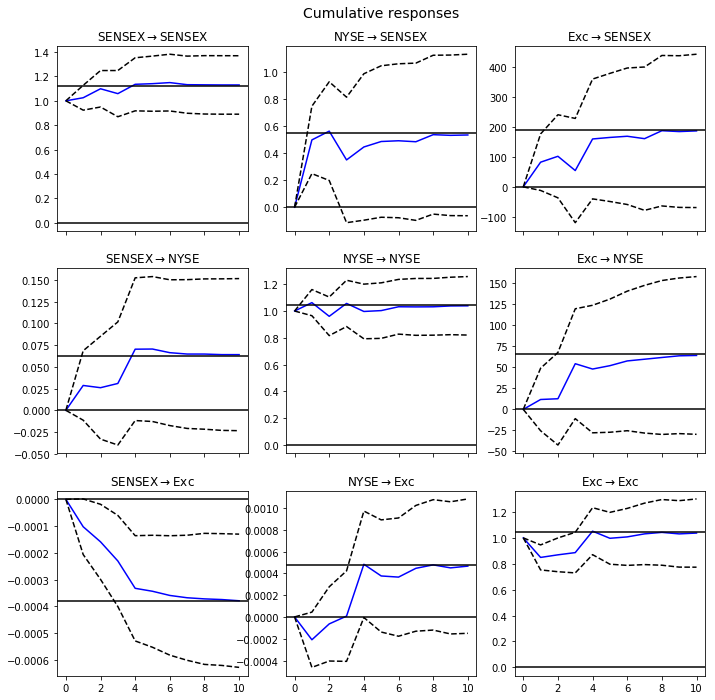

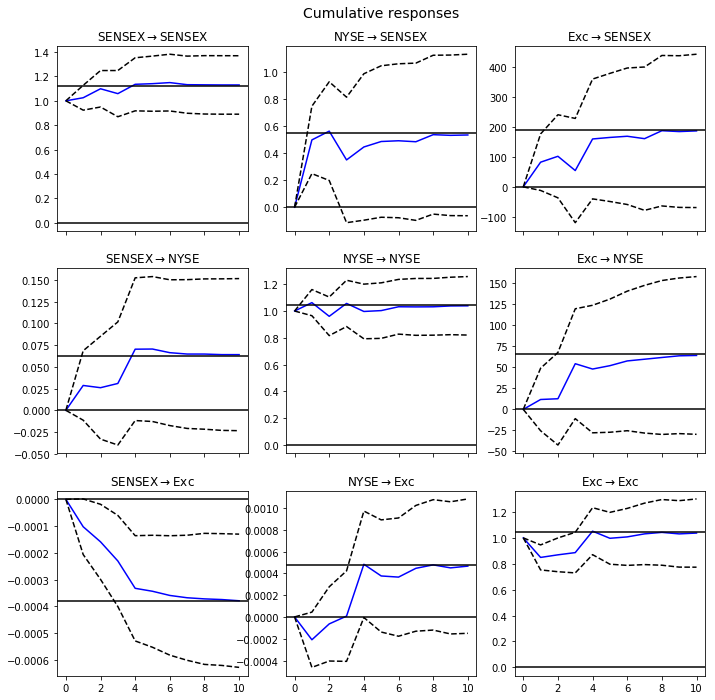

In [98]:
irf.plot_cum_effects(orth=False)